Data Exploration

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cirpy

%matplotlib inline

#Importing the RDKit packages
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

Units of each database:
ECOTOX - mg/L
TOXRIC - mg/kg
ADORE - mg/L and mol/L

However, as these values refer to water then I will assume a density of 1 kg/L => mg/kg = mg/L

Importing the first database from ECOTOX.

In [2]:
ecotox = pd.read_excel('ECOTOX-Aquatic-Export_20231116_142805.xlsx')
ecotox.head()

/Users/aronalagaraj/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CAS Number                                      Chemical Name  \
0       50282            (17beta)Estra-1,3,5(10)triene-3,17-diol   
1       50282            (17beta)Estra-1,3,5(10)triene-3,17-diol   
2       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
3       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
4       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   

                                      Chemical Grade Chemical Analysis  \
0                                                NaN        Unmeasured   
1                                                NaN        Unmeasured   
2                                                NaN        Unmeasured   
3  Technical grade, technical product, technical ...        Unmeasured   
4                                                NaN        Unmeasured   

  Chemical Purity Mean Op  Chemical Purity Mean(%)  Chemical Purity Min Op  \
0                     NaN                      NaN                     NaN   
1                     NaN                      NaN                     NaN   
2                     NaN                      NaN                     NaN   
3                     NaN                     99.0                     NaN   
4                     NaN                      NaN                     NaN   

   Chemical Purity Min(%)  Chemical Purity Max Op  Chemical Purity Max(%)  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

   ... BCF 3 Min Op BCF 3 Min BCF 3 Max Op BCF 3 Max BCF 3 Unit  \
0  ...          NaN       NaN          NaN       NaN        NaN   
1  ...          NaN       NaN          NaN       NaN        NaN   
2  ...          NaN       NaN          NaN       NaN        NaN   
3  ...          NaN       NaN          NaN       NaN        NaN   
4  ...          NaN       NaN          NaN       NaN        NaN   

                                              Author  Reference Number  \
0  Hirano,M., H. Ishibashi, N. Matsumura, Y. Naga...             94641   
1  Brennan,S.J., C.A. Brougham, J.J. Roche, and A...             84441   
2                                          Vilkas,A.             13007   
3                       Brausch,J.M., and P.N. Smith            117583   
4        Gaaboub,I.A., F.M. El-Gayar, and E.M. Helal             15291   

                                               Title  \
0  Acute Toxicity Responses of Two Crustaceans, A...   
1  Multi-Generational Effects of Four Selected En...   
2  Acute Toxicity of Diazinon Technical to the Wa...   
3  Development of Resistance to Cyfluthrin and Na...   
4  Comparative Bioassay Studies on Larvae of Cule...   

                               Source  Publication Year  
0         J. Health Sci.50(1): 97-100              2004  
1                 Chemosphere64:49-55              2006  
2  U.S.EPA-OPP Registration Standard:              1976  
3         Ecotoxicology18(5): 600-609              2009  
4    Bull. Entomol. Soc. Egypt9:77-84              1975  

[5 rows x 86 columns]

Keeping only the 48 hr results.

In [3]:
ecotox = ecotox.loc[ecotox['Observed Duration Mean (Days)'] == 2]
print("Number of datapoints in ECOTOX is %s." % len(ecotox))
ecotox.head()

Number of datapoints in ECOTOX is 441.


CAS Number                                      Chemical Name  \
0       50282            (17beta)Estra-1,3,5(10)triene-3,17-diol   
2       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
3       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
7       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
8       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   

                                      Chemical Grade Chemical Analysis  \
0                                                NaN        Unmeasured   
2                                                NaN        Unmeasured   
3  Technical grade, technical product, technical ...        Unmeasured   
7  Technical grade, technical product, technical ...        Unmeasured   
8                                                NaN        Unmeasured   

  Chemical Purity Mean Op  Chemical Purity Mean(%)  Chemical Purity Min Op  \
0                     NaN                      NaN                     NaN   
2                     NaN                      NaN                     NaN   
3                     NaN                     99.0                     NaN   
7                     NaN                     99.0                     NaN   
8                     NaN                      NaN                     NaN   

   Chemical Purity Min(%)  Chemical Purity Max Op  Chemical Purity Max(%)  \
0                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
7                     NaN                     NaN                     NaN   
8                     NaN                     NaN                     NaN   

   ... BCF 3 Min Op BCF 3 Min BCF 3 Max Op BCF 3 Max BCF 3 Unit  \
0  ...          NaN       NaN          NaN       NaN        NaN   
2  ...          NaN       NaN          NaN       NaN        NaN   
3  ...          NaN       NaN          NaN       NaN        NaN   
7  ...          NaN       NaN          NaN       NaN        NaN   
8  ...          NaN       NaN          NaN       NaN        NaN   

                                              Author  Reference Number  \
0  Hirano,M., H. Ishibashi, N. Matsumura, Y. Naga...             94641   
2                                          Vilkas,A.             13007   
3                       Brausch,J.M., and P.N. Smith            117583   
7                       Brausch,J.M., and P.N. Smith            117583   
8   Ziegenfuss,P.S., W.J. Renaudette, and W.J. Adams              7884   

                                               Title  \
0  Acute Toxicity Responses of Two Crustaceans, A...   
2  Acute Toxicity of Diazinon Technical to the Wa...   
3  Development of Resistance to Cyfluthrin and Na...   
7  Development of Resistance to Cyfluthrin and Na...   
8  Methodology for Assessing the Acute Toxicity o...   

                               Source  Publication Year  
0         J. Health Sci.50(1): 97-100              2004  
2  U.S.EPA-OPP Registration Standard:              1976  
3         Ecotoxicology18(5): 600-609              2009  
7         Ecotoxicology18(5): 600-609              2009  
8     ASTM Spec. Tech. Publ.9:479-493              1986  

[5 rows x 86 columns]

Importing the second database from TOXRIC.

In [4]:
toxric = pd.read_csv('TOXRIC_Ecotoxicity_LC50DM.csv')
print("Number of datapoints in TOXRIC is %s." % len(toxric))
toxric.head()

Number of datapoints in TOXRIC is 349.


TAID                Name  \
0   TOX-28       nitroglycerin   
1  TOX-475                 NaN   
2  TOX-593  diethylstilbestrol   
3  TOX-672           menadione   
4  TOX-877  PIPERONYL BUTOXIDE   

                                          IUPAC Name  PubChem CID  \
0                  1,3-dinitrooxypropan-2-yl nitrate         4510   
1               4-(2,4,4-trimethylpentan-2-yl)phenol         8814   
2     4-[(E)-4-(4-hydroxyphenyl)hex-3-en-3-yl]phenol       448537   
3                      2-methylnaphthalene-1,4-dione         4055   
4  5-[2-(2-butoxyethoxy)ethoxymethyl]-6-propyl-1,...         5794   

                               Canonical SMILES                     InChIKey  \
0  O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-]  SNIOPGDIGTZGOP-UHFFFAOYSA-N   
1                   CC(C)(C)CC(C)(C)c1ccc(O)cc1  ISAVYTVYFVQUDY-UHFFFAOYSA-N   
2           CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1  RGLYKWWBQGJZGM-ISLYRVAYSA-N   
3                        CC1=CC(=O)c2ccccc2C1=O  MJVAVZPDRWSRRC-UHFFFAOYSA-N   
4                CCCCOCCOCCOCc1cc2c(cc1CCC)OCO2  FIPWRIJSWJWJAI-UHFFFAOYSA-N   

   Toxicity Value  
0       32.003532  
1        0.090062  
2        1.144513  
3        0.490888  
4        1.731532

Checking if there are duplicate SMILES due to any errors as there aren't any duplicate molecules in this database.

In [5]:
toxric_dups = toxric[toxric.duplicated(subset=['Canonical SMILES'], keep=False)]
toxric_dups

TAID                           Name                     IUPAC Name  \
112   TOX-5078                            NaN        2-methylcyclohexan-1-ol   
136   TOX-5405                            NaN         N-ethylcyclohexanamine   
152   TOX-5618                            NaN        3-methylcyclohexan-1-ol   
166   TOX-5867  Cyclohexyl diphenyl phosphate  cyclohexyl diphenyl phosphate   
274  TOX-80987                       o-cresol                 2-methylphenol   
292  TOX-82893            TRIPHENYL PHOSPHATE            triphenyl phosphate   
295  TOX-83166                       m-cresol                 3-methylphenol   
300  TOX-83895                            NaN                 N-ethylaniline   

     PubChem CID                    Canonical SMILES  \
112        11418                          Cc1ccccc1O   
136        21609                         CCNc1ccccc1   
152        11566                        Cc1cccc(O)c1   
166      3034145  O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1   
274          335                          Cc1ccccc1O   
292         8289  O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1   
295          342                        Cc1cccc(O)c1   
300         7670                         CCNc1ccccc1   

                        InChIKey  Toxicity Value  
112  NDVWOBYBJYUSMF-UHFFFAOYSA-N       15.945130  
136  AGVKXDPPPSLISR-UHFFFAOYSA-N        0.441153  
152  HTSABYAWKQAHBT-UHFFFAOYSA-N       19.843948  
166  CPKKNIYMTSBFIQ-UHFFFAOYSA-N        1.017491  
274  QWVGKYWNOKOFNN-UHFFFAOYSA-N       15.100327  
292  XZZNDPSIHUTMOC-UHFFFAOYSA-N        0.999119  
295  RLSSMJSEOOYNOY-UHFFFAOYSA-N       18.792578  
300  OJGMBLNIHDZDGS-UHFFFAOYSA-N        0.420176

Correcting the SMILES in the database.

In [6]:
pd.options.mode.chained_assignment = None #Removes iteration warning

for i in toxric_dups['IUPAC Name']:
    correct_SMILES = cirpy.resolve(i, 'smiles') #Retrieves correct SMILES
    index = toxric[toxric['IUPAC Name']==i].index.values[0]
    toxric['Canonical SMILES'][index] = correct_SMILES

toxric_dups_check = toxric[toxric.duplicated(subset=['Canonical SMILES'], keep=False)]
toxric_dups_check

Empty DataFrame
Columns: [TAID, Name, IUPAC Name, PubChem CID, Canonical SMILES, InChIKey, Toxicity Value]
Index: []

Importing the third database, ADORE.

In [7]:
nature = pd.read_csv('Nature_ADORE_LC50DM48.csv')
nature

test_id  reference_number   test_cas test_location test_exposure_type  \
0     1000108                34  7727-21-1           LAB                 NR   
1     1000115                34  7775-27-1           LAB                 NR   
2     1000121                34  7727-54-0           LAB                 NR   
3     1001516               212    64-17-5           LAB                  S   
4     1001534               212   108-90-7           LAB                  S   
...       ...               ...        ...           ...                ...   
2041  2292843             61942  7440-28-0           LAB                 NR   
2042  2292843             61942  7440-28-0           LAB                 NR   
2043  2292843             61942  7440-28-0           LAB                 NR   
2044  2292843             61942  7440-28-0           LAB                 NR   
2045  2292843             61942  7440-28-0           LAB                 NR   

     test_control_type test_media_type test_application_freq_unit  \
0                    I              FW                         NR   
1                    I              FW                         NR   
2                    I              FW                         NR   
3                    S              FW                          X   
4                    S              FW                          X   
...                ...             ...                        ...   
2041                 M              FW                         NR   
2042                 M              FW                         NR   
2043                 M              FW                         NR   
2044                 M              FW                         NR   
2045                 M              FW                         NR   

     test_organism_lifestage  result_id  ... tax_ps_ampkap tax_ps_amppm  \
0                         NR     125801  ...        0.5809       1200.0   
1                         NR     125808  ...        0.5809       1200.0   
2                         NR     125814  ...        0.5809       1200.0   
3                         NE     113300  ...        0.5809       1200.0   
4                         NE     113318  ...        0.5809       1200.0   
...                      ...        ...  ...           ...          ...   
2041                      NR    2683658  ...        0.5809       1200.0   
2042                      NR    2683657  ...        0.5809       1200.0   
2043                      NR    2683659  ...        0.5809       1200.0   
2044                      NR    2683660  ...        0.5809       1200.0   
2045                      NR    2683661  ...        0.5809       1200.0   

      tax_lh_amd tax_lh_lbcm tax_lh_lpcm  tax_lh_licm  tax_lh_ri#/d  \
0           45.0         0.1        0.25          NaN           NaN   
1           45.0         0.1        0.25          NaN           NaN   
2           45.0         0.1        0.25          NaN           NaN   
3           45.0         0.1        0.25          NaN           NaN   
4           45.0         0.1        0.25          NaN           NaN   
...          ...         ...         ...          ...           ...   
2041        45.0         0.1        0.25          NaN           NaN   
2042        45.0         0.1        0.25          NaN           NaN   
2043        45.0         0.1        0.25          NaN           NaN   
2044        45.0         0.1        0.25          NaN           NaN   
2045        45.0         0.1        0.25          NaN           NaN   

      result_conc1_mean_binary  result_conc1_mean_log  \
0                            0               1.963788   
1                            0               1.810233   
2                            0               2.004321   
3                            0               3.966048   
4                            0               1.491362   
...                        ...                    ...   
2041                         0               0.287802   
2042              

In [8]:
print(cirpy.resolve('7727-21-1','smiles'))
print(cirpy.resolve('7775-27-1','smiles'))
print(cirpy.resolve('52918-63-5','smiles'))
print(cirpy.resolve('52315-07-8','smiles'))
print(cirpy.resolve('7789-00-6','smiles'))
print(cirpy.resolve('174501-65-6','smiles'))
print(cirpy.resolve('55-86-7','smiles'))

[K+].[K+].[O-][S](=O)(=O)OO[S]([O-])(=O)=O
[Na+].[Na+].[O-][S](=O)(=O)OO[S]([O-])(=O)=O
CC1(C)[C@@H](C=C(Br)Br)[C@H]1C(=O)O[C@H](C#N)c2cccc(Oc3ccccc3)c2
CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)c2cccc(Oc3ccccc3)c2
[K+].[K+].[O-][Cr]([O-])(=O)=O
None
[H+].[Cl-].CN(CCCl)CCCl


As shown above, some of the molecules are salts and some molecules are unable to have their SMILES retrieved, which means it can't be used for the dataset.
These will be removed.

In [9]:
# nature_filt = nature
# indices_to_drop = []
#
# for i in range(len(nature['test_cas'])):
#     cas_no = nature['test_cas'][i]
#     try:
#         smiles = cirpy.resolve(cas_no,'smiles')
#     except:
#         smiles = None
#     if smiles is None:
#         indices_to_drop.append(i)
#     elif '+' in smiles:
#         indices_to_drop.append(i)
#
# nature_filt = nature_filt.drop(indices_to_drop)
# nature_filt

In [10]:
# nature_filt = nature_filt.reset_index(drop=True)
# nature_filt.to_csv('Nature_ADORE_filtered.csv', sep=',', index=False, encoding='utf-8')
# nature_filt

Saving the above the dataframe as a CSV as it took ~20 mins to calculate.

In [11]:
nature_filt = pd.read_csv('Nature_ADORE_filtered.csv')
print("Number of datapoints in nature is %s." % len(nature_filt))
nature_filt.head()

Number of datapoints in nature is 1210.


test_id  reference_number  test_cas test_location test_exposure_type  \
0  1001516               212   64-17-5           LAB                  S   
1  1001534               212  108-90-7           LAB                  S   
2  1001552               212   67-66-3           LAB                  S   
3  1001571               212  106-48-9           LAB                  S   
4  1001589               212  108-95-2           LAB                  S   

  test_control_type test_media_type test_application_freq_unit  \
0                 S              FW                          X   
1                 S              FW                          X   
2                 S              FW                          X   
3                 S              FW                          X   
4                 S              FW                          X   

  test_organism_lifestage  result_id  ... tax_ps_ampkap tax_ps_amppm  \
0                      NE     113300  ...        0.5809       1200.0   
1                      NE     113318  ...        0.5809       1200.0   
2                      NE     113336  ...        0.5809       1200.0   
3                      NE     113355  ...        0.5809       1200.0   
4                      NE     113496  ...        0.5809       1200.0   

   tax_lh_amd tax_lh_lbcm tax_lh_lpcm  tax_lh_licm  tax_lh_ri#/d  \
0        45.0         0.1        0.25          NaN           NaN   
1        45.0         0.1        0.25          NaN           NaN   
2        45.0         0.1        0.25          NaN           NaN   
3        45.0         0.1        0.25          NaN           NaN   
4        45.0         0.1        0.25          NaN           NaN   

   result_conc1_mean_binary  result_conc1_mean_log result_conc1_mean_mol_log  
0                         0               3.966048                 -0.697361  
1                         0               1.491362                 -3.560022  
2                         0               2.547775                 -2.529120  
3                         0               0.778151                 -4.330955  
4                         0               1.113943                 -3.859706  

[5 rows x 46 columns]

In [12]:
import statistics

nature_dups = nature_filt[nature_filt.duplicated(subset=['test_cas'],keep=False)]
nature_dups_unique = nature_filt[nature_filt.duplicated(subset=['test_cas'],keep='first')].drop_duplicates(subset=['test_cas'],keep='first')

smiles_nature_dups = []
median_values_nature_dups = []

for i in nature_dups_unique['test_cas']:
    new_df = nature_dups.loc[nature_dups['test_cas'] == i]
    values = [j for j in new_df['result_conc1_mean']]

    smiles_nature_dups.append(cirpy.resolve(i,'smiles'))
    median_values_nature_dups.append(statistics.median(values))

In [13]:
nature_NOT_dups = nature_filt.drop_duplicates(subset=['test_cas'],keep=False)

smiles_nature_NOT_dups = [cirpy.resolve(nature_NOT_dups.iloc[i]['test_cas'],'smiles') for i in range(len(nature_NOT_dups['test_cas']))]
conc_values_nature_NOT_dups = [nature_NOT_dups.iloc[i]['result_conc1_mean'] for i in range(len(nature_NOT_dups['test_cas']))]

In [14]:
toxric_smiles = [toxric['Canonical SMILES'][i] for i in range(len(toxric['Canonical SMILES']))]
toxric_concs = [toxric['Toxicity Value'][i] for i in range(len(toxric['Canonical SMILES']))]

Combining the data from Nature and TOXRIC databases

In [15]:
all_smiles = smiles_nature_dups + smiles_nature_NOT_dups + toxric_smiles
all_concs = median_values_nature_dups + conc_values_nature_NOT_dups + toxric_concs

complete_data = pd.DataFrame(
    {'SMILES' : all_smiles,
     'LC50' : all_concs}
)
complete_data

SMILES       LC50
0                                                 ClCl   0.120000
1                                            Oc1ccccc1  13.300000
2                               CNC(=O)CS[P](=S)(OC)OC   1.650000
3                   CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C   0.001000
4        ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl   0.328000
..                                                 ...        ...
799  C/C=C(\C)C(=O)OC1CC(OC(C)=O)C2(C(=O)OC)COC3C2C...   0.621948
800                                     Cc1ccc2sccc2c1  13.993811
801                        Clc1cc(Cl)c(-c2ccccc2)cc1Cl   0.589899
802                           CSc1nc(N)nc(NC(C)(C)C)n1  10.990340
803                              Clc1cccc(-c2ccccc2)c1   0.430186

[804 rows x 2 columns]

In [16]:
complete_data = complete_data.drop_duplicates(subset='SMILES',keep='last')
complete_data.head()

SMILES   LC50
0                                           ClCl  0.120
2                         CNC(=O)CS[P](=S)(OC)OC  1.650
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392

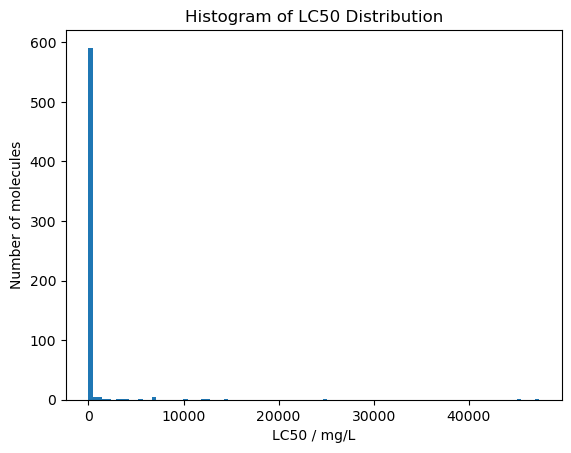

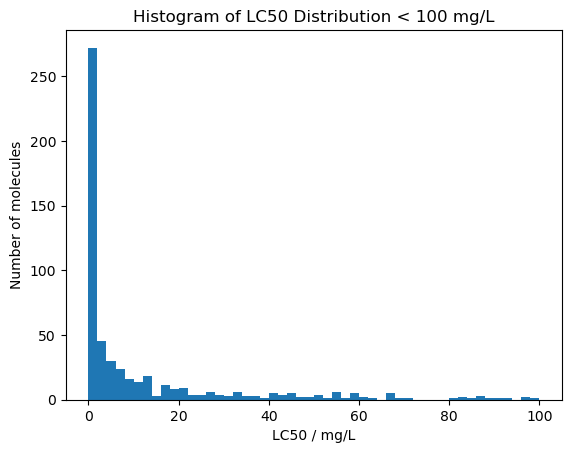

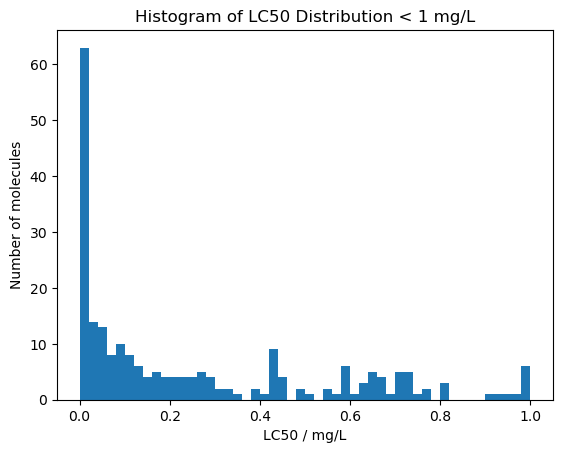

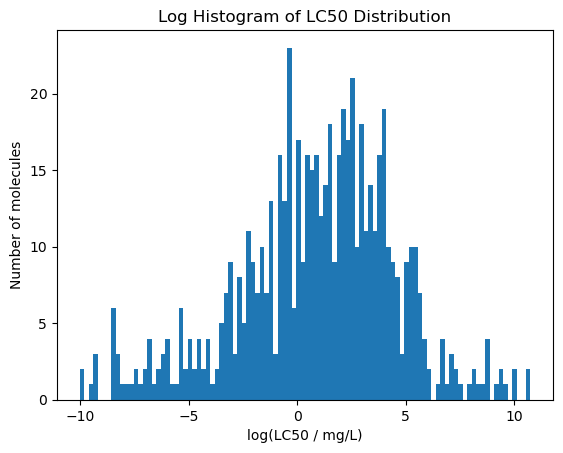

In [17]:
plt.hist(complete_data['LC50'],bins=100)
plt.ylabel('Number of molecules')
plt.xlabel('LC50 / mg/L')
plt.title('Histogram of LC50 Distribution')
plt.show()

subset = [i for i in complete_data['LC50'] if i <= 100]
plt.hist(subset,bins=50)
plt.ylabel('Number of molecules')
plt.xlabel('LC50 / mg/L')
plt.title('Histogram of LC50 Distribution < 100 mg/L')
plt.show()

subset2 = [i for i in complete_data['LC50'] if i <= 1]
plt.hist(subset2,bins=50)
plt.ylabel('Number of molecules')
plt.xlabel('LC50 / mg/L')
plt.title('Histogram of LC50 Distribution < 1 mg/L')
plt.show()

subset3 = np.log(complete_data['LC50'])
plt.hist(subset3,bins=100)
plt.ylabel('Number of molecules')
plt.xlabel('log(LC50 / mg/L)')
plt.title('Log Histogram of LC50 Distribution')
plt.show()

[16:23:47] SMILES Parse Error: syntax error while parsing: O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC
[16:23:47] SMILES Parse Error: Failed parsing SMILES 'O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC' for input: 'O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC'
[16:23:47] SMILES Parse Error: syntax error while parsing: [Cl]|[Sn](|[Cl])(|[Cl])|[Cl]
[16:23:47] SMILES Parse Error: Failed parsing SMILES '[Cl]|[Sn](|[Cl])(|[Cl])|[Cl]' for input: '[Cl]|[Sn](|[Cl])(|[Cl])|[Cl]'
[16:23:47] SMILES Parse Error: syntax error while parsing: CC[Pb](|[O]C(=O)C(C)=C)(CC)CC
[16:23:47] SMILES Parse Error: Failed parsing SMILES 'CC[Pb](|[O]C(=O)C(C)=C)(CC)CC' for input: 'CC[Pb](|[O]C(=O)C(C)=C)(CC)CC'


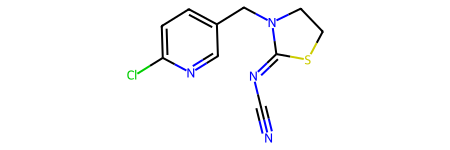

In [18]:
PandasTools.AddMoleculeColumnToFrame(complete_data,'SMILES','Structure')

complete_data.dropna(subset=['Structure'], inplace=True)

from random import randint
complete_data['Structure'][randint(0,len(complete_data))] #Example of one structure

In [19]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]

    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

Mol_descriptors,desc_names = RDkit_descriptors(complete_data['SMILES'])

[16:23:47] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-311/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[16:23:47] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-311/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[16:23:47] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-311/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAto

In [20]:
dataset_with_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
dataset_with_descriptors.head()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           4.111111        4.111111           4.111111        4.111111   
1          11.782078       11.782078           0.410787       -4.494295   
2           8.217198        8.217198           1.419594       -5.502894   
3          11.785031       11.785031           0.648458       -3.394236   
4          12.725053       12.725053           0.107046       -4.591476   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.404263   3.000000   70.906          70.906   69.937705   
1  0.712117  30.333333  229.263         217.167  228.999622   
2  0.717616  33.578947  304.352         283.184  304.101050   
3  0.575409  69.894737  406.929         400.881  403.816881   
4  0.614195  26.210526  317.328         305.232  316.994536   

   NumValenceElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                   14  ...             0           0                  0   
1                   72  ...             0           0                  0   
2                  108  ...             0           0                  0   
3                  108  ...             0           0                  0   
4                  102  ...             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0             0            0            0             0                 0   
1             0            0            0             0                 0   
2             0            0            0             0                 0   
3             0            0            0             0                 0   
4             0            0            0             0                 0   

   fr_urea        SPS  
0        0   3.000000  
1        0  30.333333  
2        0  33.578947  
3        0  69.894737  
4        0  26.210526  

[5 rows x 211 columns]

In [21]:
dataset_with_descriptors = dataset_with_descriptors.dropna(axis=1)
dataset_with_descriptors

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0             4.111111        4.111111           4.111111        4.111111   
1            11.782078       11.782078           0.410787       -4.494295   
2             8.217198        8.217198           1.419594       -5.502894   
3            11.785031       11.785031           0.648458       -3.394236   
4            12.725053       12.725053           0.107046       -4.591476   
..                 ...             ...                ...             ...   
612          15.931675       15.931675           1.984516       -7.076048   
613           7.826782        7.826782           0.016551       -2.671901   
614           7.978953        7.978953           0.210123       -0.565676   
615           8.060211        8.060211           0.009568       -3.817037   
616           7.907842        7.907842           0.344444       -0.604256   

          qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0    0.404263   3.000000   70.906          70.906   69.937705   
1    0.712117  30.333333  229.263         217.167  228.999622   
2    0.717616  33.578947  304.352         283.184  304.101050   
3    0.575409  69.894737  406.929         400.881  403.816881   
4    0.614195  26.210526  317.328         305.232  316.994536   
..        ...        ...      ...             ...         ...   
612  0.140161  85.725490  720.721         676.369  720.262935   
613  0.537843  23.200000  148.230         140.166  148.034671   
614  0.607063  16.866667  257.547         250.491  255.961333   
615  0.722827  30.428571  213.310         198.190  213.104816   
616  0.634617  19.615385  188.657         179.585  188.039278   

     NumValenceElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                     14  ...             0           0                  0   
1                     72  ...             0           0                  0   
2                    108  ...             0           0                  0   
3                    108  ...             0           0                  0   
4                    102  ...             0           0                  0   
..                   ...  ...           ...         ...                ...   
612                  280  ...             0           0                  0   
613                   50  ...             0           0                  0   
614                   76  ...             0           0                  0   
615                   78  ...             0           0                  0   
616                   64  ...             0           0                  0   

     fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0               0            0            0             0                 0   
1               0            0            0             0                 0   
2               0            0            0             0                 0   
3               0            0            0             0                 0   
4               0            0            0             0                 0   
..            ...          ...          ...           ...               ...   
612             0            0            0             0                 0   
613             0            0            0             1                 0   
614             0            0            0             0                 0   
615             0            0            0             0                 0   
616             0            0            0             0                 0   

     fr_urea        SPS  
0          0   3.000000  
1          0  30.333333  
2          0  33.578947  
3          0  69.894737  
4          0  26.210526  
..       ...        ...  
612        0  85.725490  
613        0  23.200000  
614        0  16.866667  
615        0  30.428571  
616        0  19.615385  

[617 rows x 199 columns]

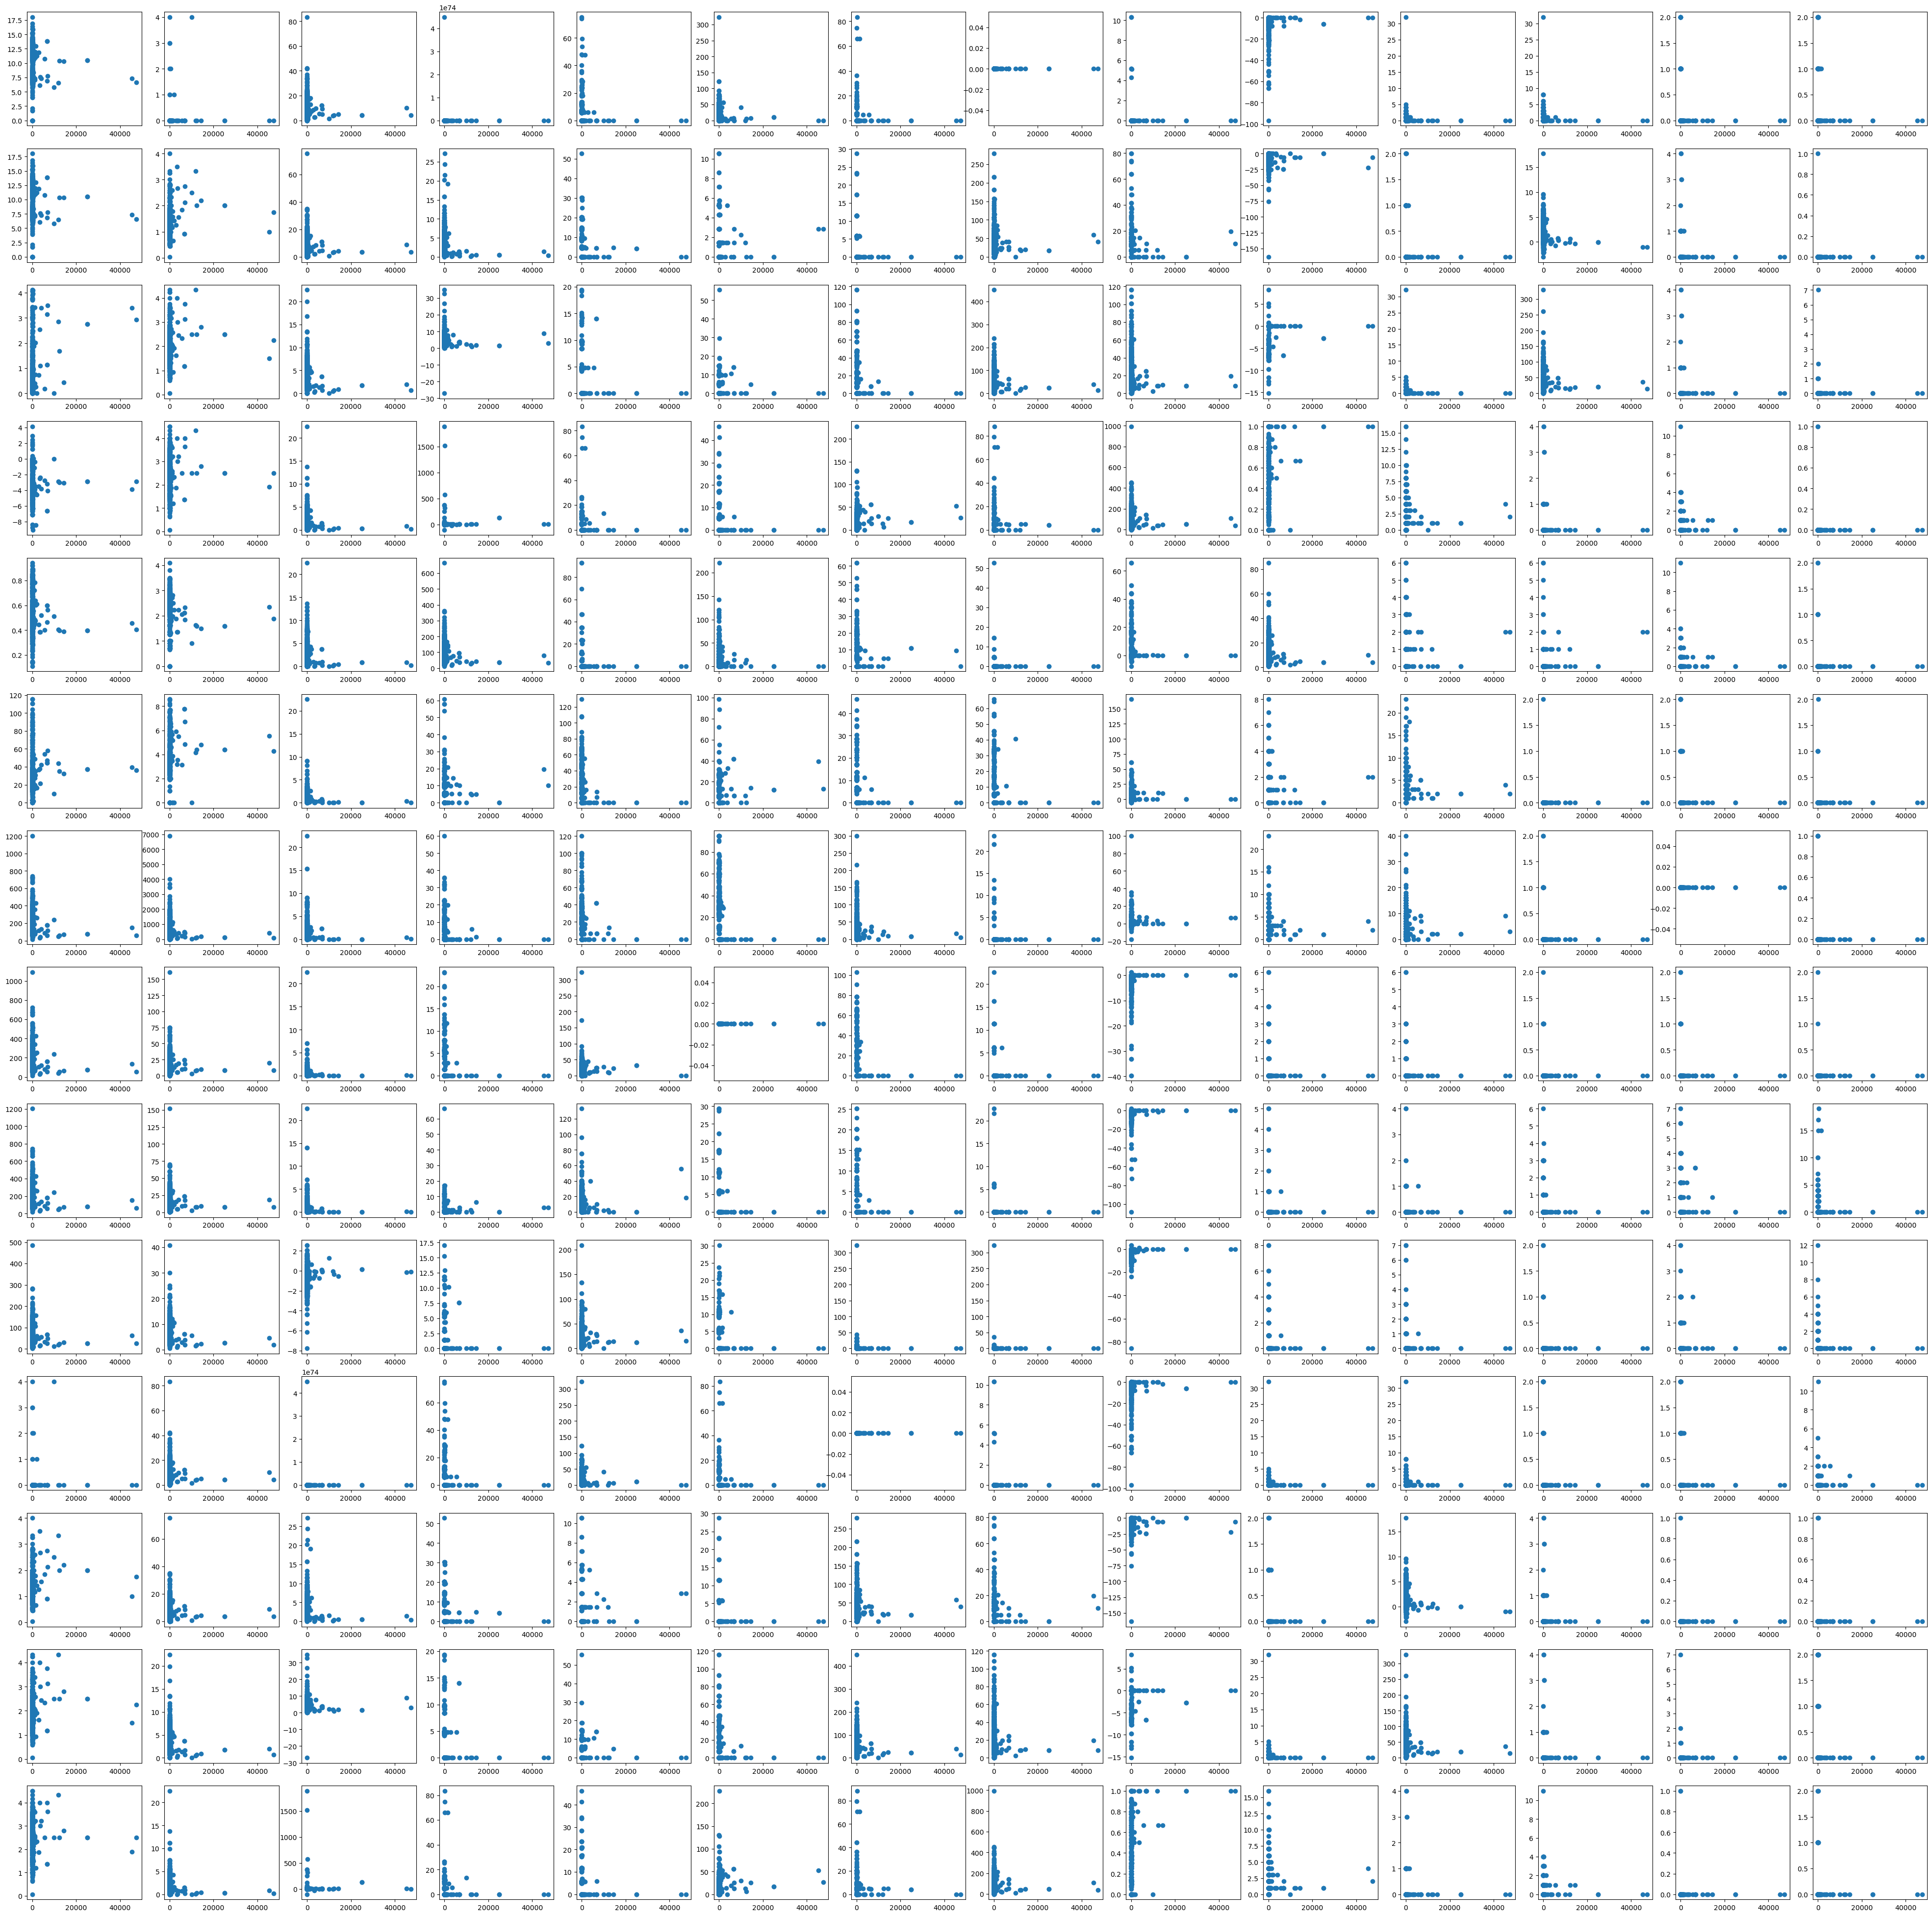

In [22]:
LC50 = complete_data['LC50'].to_numpy()
x1, y1 = 14,14
fig,axs = plt.subplots(x1,y1,figsize=(50,50))

for i in range(y1):
    for j in range(x1):
        y = dataset_with_descriptors[dataset_with_descriptors.columns[10*i+j]].to_numpy()
        try:
            if y.shape[1] >= 2:
                y = y[:,0]
        except:
            pass
        axs[j,i].scatter(LC50,y)

plt.show()

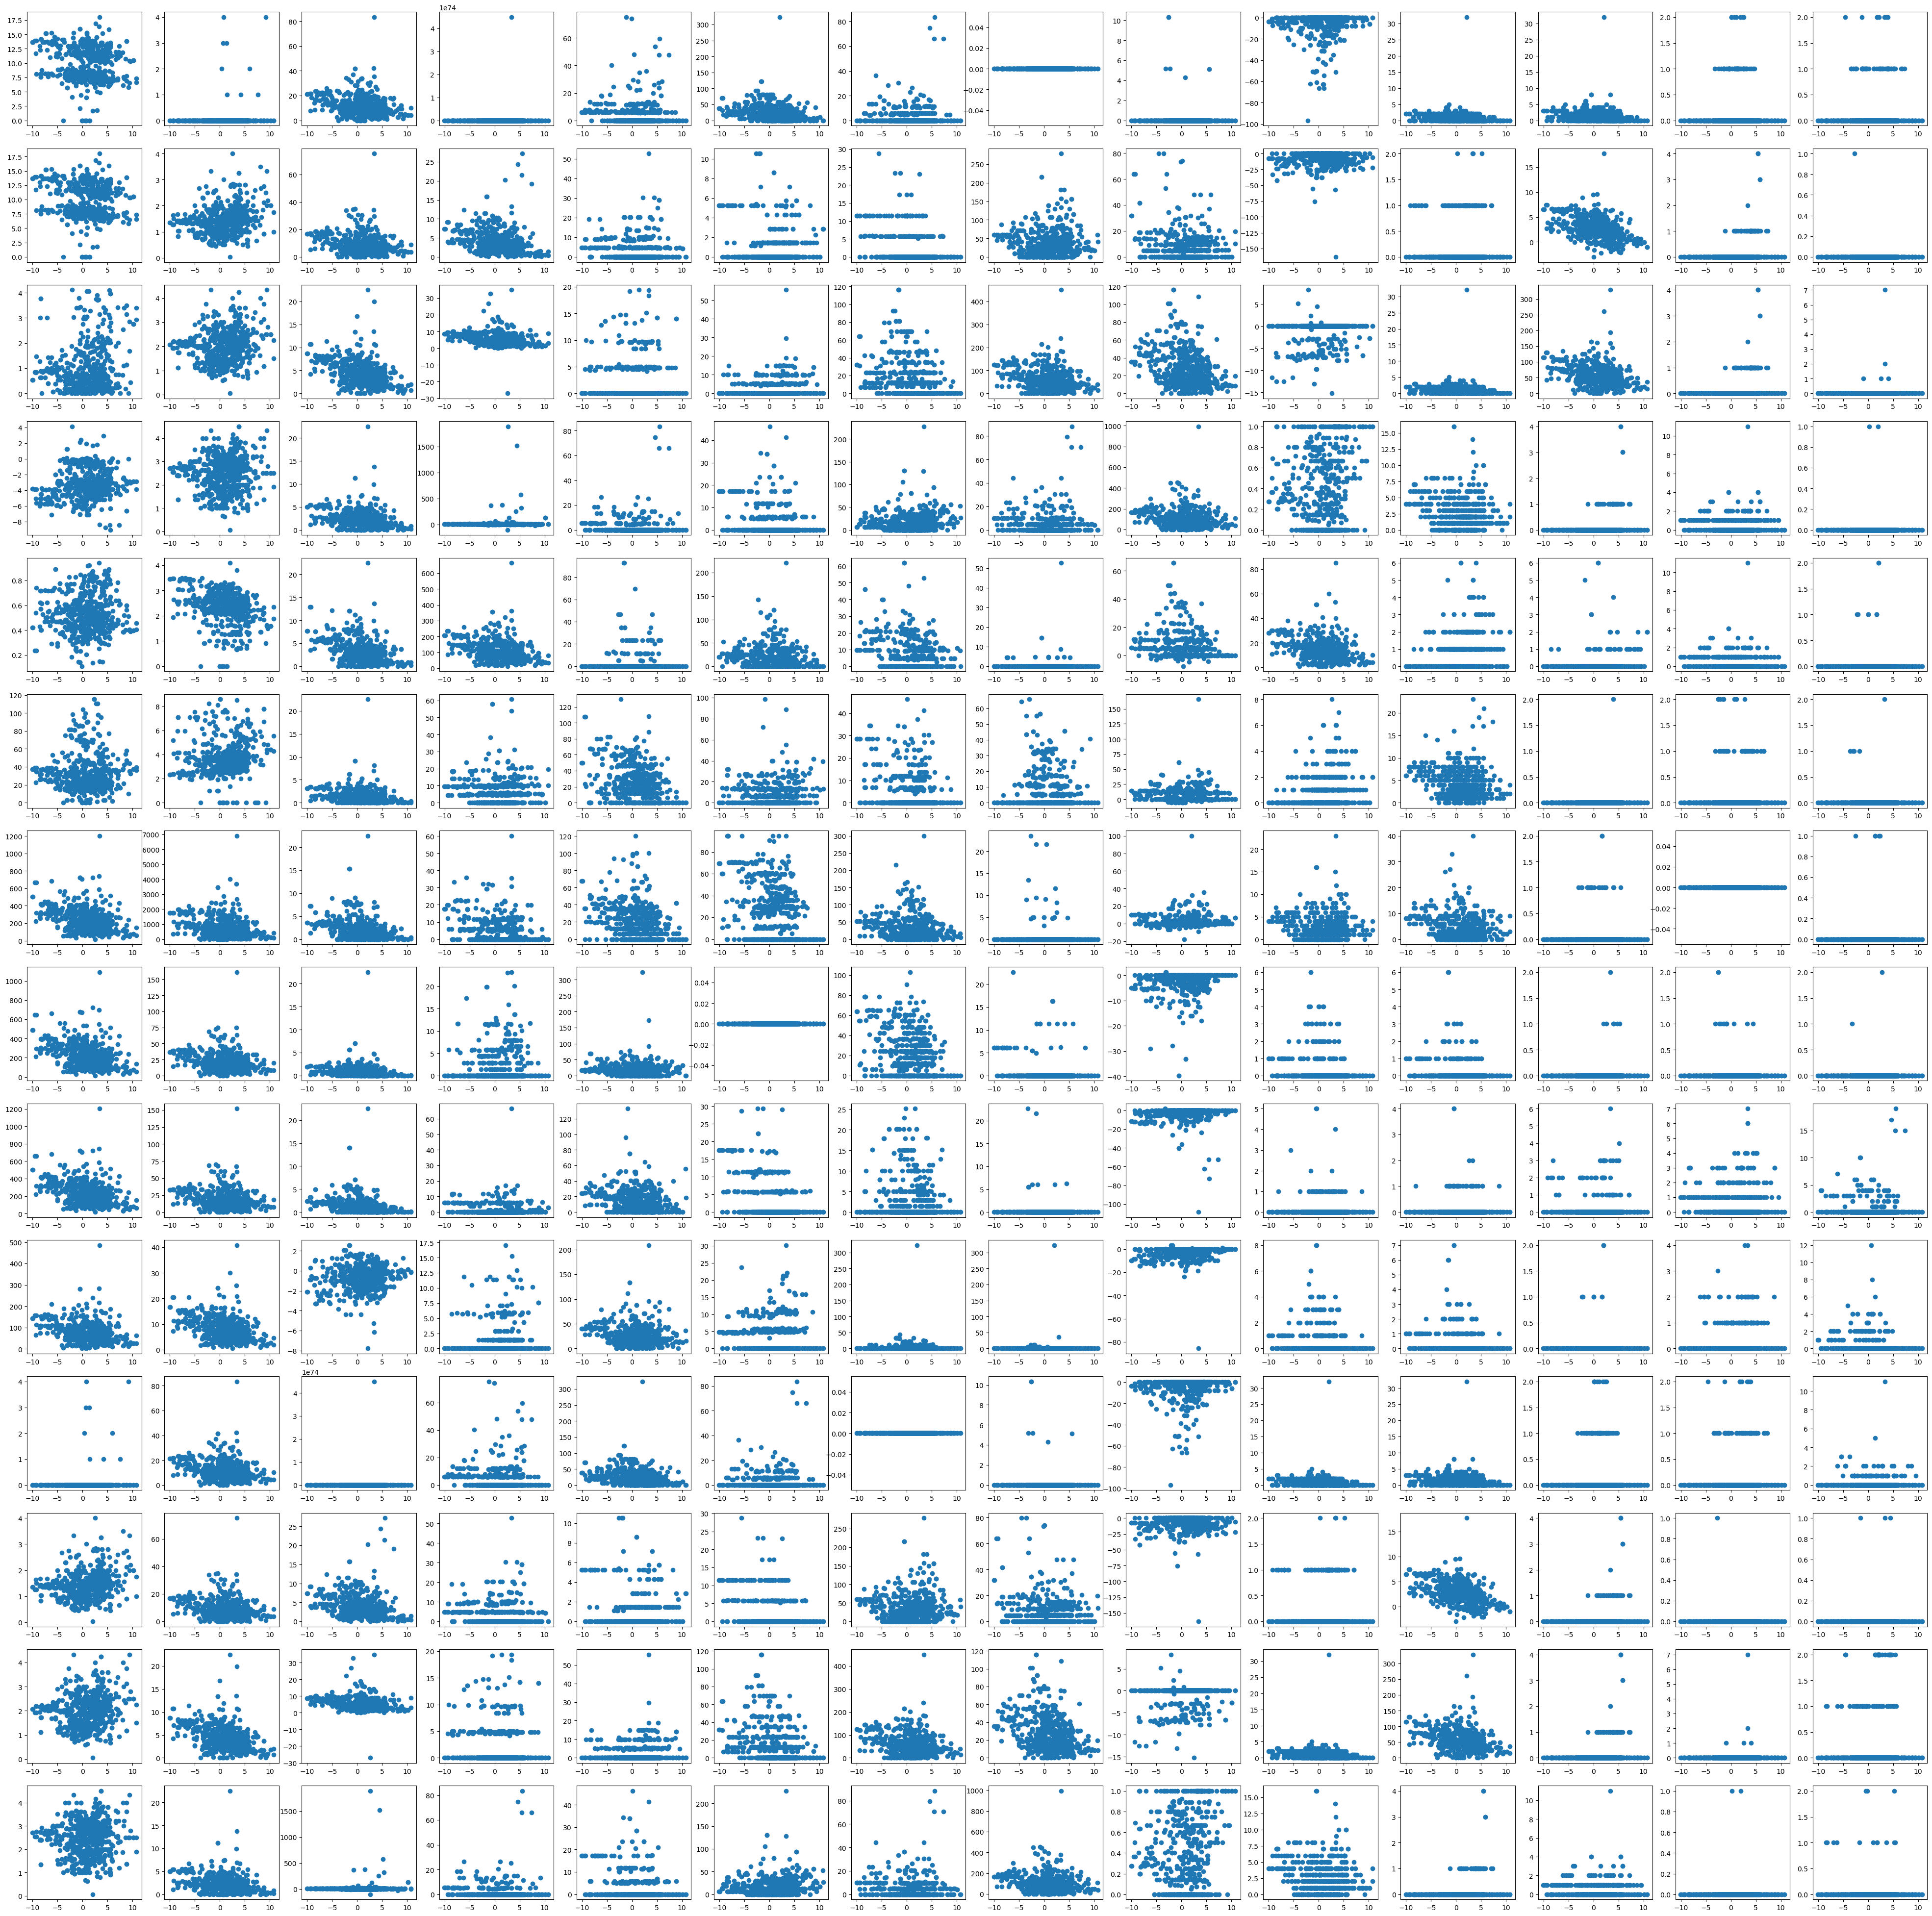

In [23]:
LC50 = np.log(complete_data['LC50'].to_numpy())
x1, y1 = 14,14
fig,axs = plt.subplots(x1,y1,figsize=(50,50))

for i in range(y1):
    for j in range(x1):
        y = dataset_with_descriptors[dataset_with_descriptors.columns[10*i+j]].to_numpy()
        try:
            if y.shape[1] >= 2:
                y = y[:,0]
        except:
            pass
        axs[j,i].scatter(LC50,y)

plt.show()

Starting the ML training

Using:
    Acute 1: <= 1 mg/L
    Acute 2: >1 and <= 10 mg/L
    Acute 3: >10 and <= 100 mg/L
    Non-toxic: >100 mg/L

Let 0 = Non-toxic, 1 = Acute 3, 2 = Acute 2, 3 = Acute 1

In [24]:
toxic_classes = []

for i in complete_data['LC50']:
    if i <= 1:
        toxic_classes.append(3)
    elif i <= 10:
        toxic_classes.append(2)
    elif i <= 100:
        toxic_classes.append(1)
    else:
        toxic_classes.append(0)

complete_data['Classes'] = toxic_classes
complete_data.head()

SMILES   LC50  \
0                                           ClCl  0.120   
2                         CNC(=O)CS[P](=S)(OC)OC  1.650   
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001   
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328   
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392   

                                       Structure  Classes  
0  <rdkit.Chem.rdchem.Mol object at 0x169138900>        3  
2  <rdkit.Chem.rdchem.Mol object at 0x169139b60>        2  
3  <rdkit.Chem.rdchem.Mol object at 0x16917de00>        3  
4  <rdkit.Chem.rdchem.Mol object at 0x16917eb20>        3  
6  <rdkit.Chem.rdchem.Mol object at 0x16917f1b0>        3

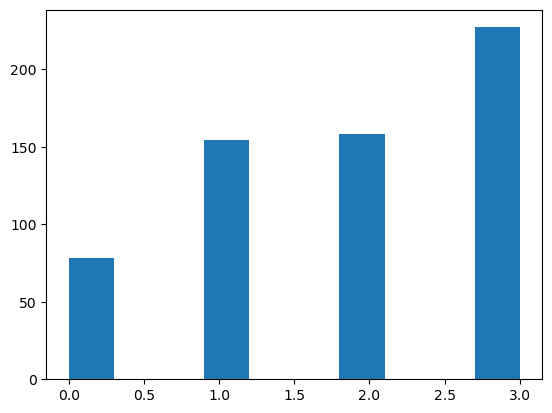

In [83]:
plt.hist(complete_data['Classes'])
plt.show()

Using a single decision tree.

In [25]:
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

x = np.array(dataset_with_descriptors)
X = np.nan_to_num(x.astype(np.float32))

y = np.array(complete_data['Classes'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
dtc = dtc.fit(X_train, y_train)

print("Decision Tree Train set Accuracy: ", metrics.accuracy_score(y_train, dtc.predict(X_train)))
print("Decision Tree Test set Accuracy: ", metrics.accuracy_score(y_test, dtc.predict(X_test)))

Decision Tree Train set Accuracy:  0.9878296146044625
Decision Tree Test set Accuracy:  0.5725806451612904


/var/folders/wl/vkrd4x2j7fs5_ybd9y74b2xm0000gn/T/ipykernel_6308/3633254025.py:6: RuntimeWarning: overflow encountered in cast
  X = np.nan_to_num(x.astype(np.float32))


Using Random Forest without any tunings.

In [26]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
rfc = RandomForestClassifier(criterion="entropy", max_depth = 10)
rfc = rfc.fit(X_train, y_train)

acc = metrics.f1_score(y_test, rfc.predict(X_test), average='micro')

print("Random Forest Train set Accuracy: ", metrics.f1_score(y_train, rfc.predict(X_train), average='micro'))
print("Random Forest Test set Accuracy: ", metrics.f1_score(y_test, rfc.predict(X_test), average='micro'))

Random Forest Train set Accuracy:  0.9878296146044625
Random Forest Test set Accuracy:  0.6693548387096774


Optimising the random forest:

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 75)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 4, num = 3)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [28]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 200], 'max_features': ['sqrt'], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [29]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

rf_model = RandomForestClassifier(n_jobs = -1)
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 1, n_jobs = -1)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 21600 candidates, totalling 64800 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66,
                                          68, 70, 72, 74, 76, 78, 80, 82, 84,
                                          86, 88, 90, 92, 94, 96, 98, 100, 102,
                                          104, 106, 108, ...]},
             verbose=1)

In [30]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 102}

In [31]:
print("Random Forest Train set Accuracy: " + str(metrics.f1_score(y_train,rf_grid.predict(X_train),average='micro')))
print("Random Forest Test set Accuracy: " + str(metrics.f1_score(y_test,rf_grid.predict(X_test),average='micro')))

Random Forest Train set Accuracy: 0.9898580121703854
Random Forest Test set Accuracy: 0.6854838709677419


Optimising a random forest version 2: (what I did)

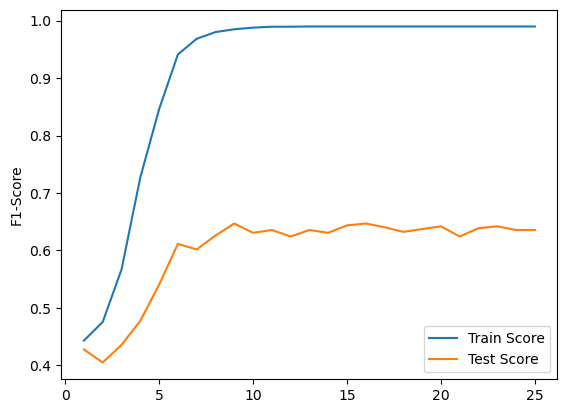

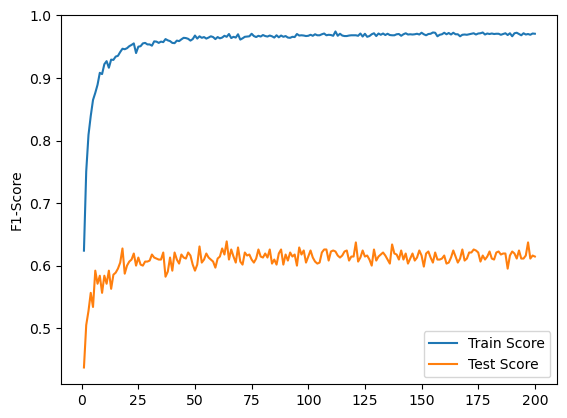

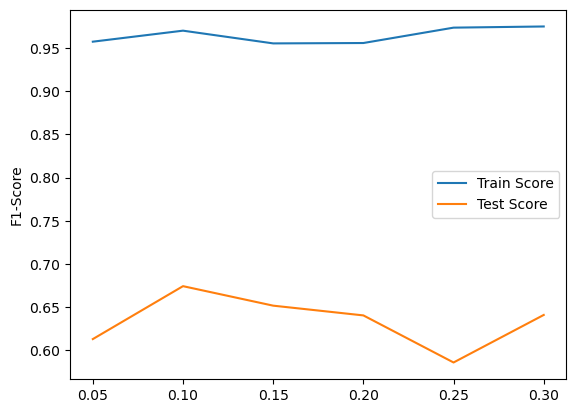

Optimal depth is 9
Optimal number of estimators is 64
Optimal test size is 0.1


In [32]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)


def model(X_train, X_test, y_train, y_test, depth, estimators, datapoints):
    train = 0
    test = 0
    for i in range(datapoints):
        rfc = RandomForestClassifier(criterion="entropy", max_depth = depth, n_estimators = estimators, n_jobs = -1)
        rfc = rfc.fit(X_train, y_train)

        train += metrics.f1_score(y_train, rfc.predict(X_train),average='micro')
        test += metrics.f1_score(y_test, rfc.predict(X_test),average='micro')

    train_avg = train / datapoints
    test_avg = test / datapoints

    return train_avg, test_avg


depth_list = np.zeros(25)
depth_train_results = np.zeros(25)
depth_test_results = np.zeros(25)

estimators_list = np.zeros(200)
estimators_train_results = np.zeros(200)
estimators_test_results = np.zeros(200)

size_list = np.zeros(6)
size_train_results = np.zeros(6)
size_test_results = np.zeros(6)


for i in range(25):
    depth_list[i] = i + 1
    depth_train_results[i],depth_test_results[i] = model(X_train, X_test, y_train, y_test,int(depth_list[i]),100,5)

plt.plot(depth_list,depth_train_results,label='Train Score')
plt.plot(depth_list,depth_test_results,label='Test Score')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

for i in range(200):
    estimators_list[i] = i + 1
    estimators_train_results[i],estimators_test_results[i] = model(X_train, X_test, y_train, y_test,7,int(estimators_list[i]),5)

plt.plot(estimators_list,estimators_train_results,label='Train Score')
plt.plot(estimators_list,estimators_test_results,label='Test Score')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

for i in range(6):
    size_list[i] = 0.05 * (i + 1)
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=size_list[i])
    size_train_results[i],size_test_results[i] = model(X_train, X_test, y_train, y_test,7,100,5)

plt.plot(size_list,size_train_results,label='Train Score')
plt.plot(size_list,size_test_results,label='Test Score')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

optimal_depth = int(depth_list[np.argmax(depth_test_results)])
optimal_estimators = int(estimators_list[np.argmax(estimators_test_results)])
optimal_test_size = size_list[np.argmax(size_test_results)]

print('Optimal depth is ' + str(optimal_depth))
print('Optimal number of estimators is ' + str(optimal_estimators))
print('Optimal test size is ' + str(optimal_test_size))

In [33]:
# import pickle
#
# best = 0
# while best < 0.75:
#     X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.15)
#     rfc = RandomForestClassifier(criterion="entropy", max_depth = 18, n_estimators = 200)
#     rfc = rfc.fit(X_train, y_train)
#
#     acc = metrics.f1_score(y_test, rfc.predict(X_test), average='micro')
#
#     if acc > best:
#         best = acc
#         with open("RandomForestModel.pickle", "wb") as f:
#             pickle.dump(rfc, f)

In [34]:
# pickle_in = open("RandomForestModel.pickle", "rb")
# rfc = pickle.load(pickle_in)
#
# print("Random Forest Train set Accuracy: ", metrics.f1_score(y_train, rfc.predict(X_train), average='micro'))
# print("Random Forest Test set Accuracy: ", metrics.f1_score(y_test, rfc.predict(X_test), average='micro'))

Using gradient-boosted trees - sklearn

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
gbc = GradientBoostingClassifier(max_depth = 10)
gbc = gbc.fit(X_train, y_train)

print("Gradient Boost sklearn Train set Accuracy: ", metrics.f1_score(y_train, gbc.predict(X_train), average='micro'))
print("Gradient Boost sklearn Test set Accuracy: ", metrics.f1_score(y_test, gbc.predict(X_test), average='micro'))

Gradient Boost sklearn Train set Accuracy:  0.9898580121703854
Gradient Boost sklearn Test set Accuracy:  0.7096774193548389


Optimising the gradient boost: - sklearn

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 75)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 4, num = 3)]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
# This determines the impact of each tree on the final outcome
# learning_rate = np.around([x for x in np.linspace(start = 0.01, stop = 0.2, num = 20)], decimals=2)
learning_rate = np.array([0.01,0.1,0.2])

In [37]:
# Create the param grid
param_grid_2 = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              # 'min_samples_split': min_samples_split,
              # 'min_samples_leaf': min_samples_leaf,
              'learning_rate': learning_rate}
print(param_grid_2)

{'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 200], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'learning_rate': array([0.01, 0.1 , 0.2 ])}


In [38]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb_model, param_grid = param_grid_2, cv = 3, verbose = 1, n_jobs = -1)
gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.1 , 0.2 ]),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66,
                                          68, 70, 72, 74, 76, 78, 80, 82, 84,
                                          86, 88, 90, 92, 94, 96, 98, 100, 102,
                                          104, 106, 108, ...]},
             verbose=1)

In [39]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 177}

In [41]:
print("Gradient Boost sklearn Train set Accuracy: " + str(metrics.f1_score(y_train,gb_grid.predict(X_train),average='micro')))
print("Gradient Boost sklearn Test set Accuracy: " + str(metrics.f1_score(y_test,gb_grid.predict(X_test),average='micro')))

Gradient Boost sklearn Train set Accuracy: 0.9918864097363083
Gradient Boost sklearn Test set Accuracy: 0.7258064516129032


Using gradient-boosted trees - XGBoost

In [65]:
import xgboost as xgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

xgb_test = xgb.XGBClassifier(objective='multi:softmax', num_class = 4, tree_method = 'hist')
xgb_test = xgb_test.fit(X_train, y_train)

print("Gradient Boost XGBoost Train set Accuracy: ", metrics.f1_score(y_train, xgb_test.predict(X_train), average='micro'))
print("Gradient Boost XGBoost Test set Accuracy: ", metrics.f1_score(y_test, xgb_test.predict(X_test), average='micro'))

Gradient Boost XGBoost Train set Accuracy:  0.9898580121703854
Gradient Boost XGBoost Test set Accuracy:  0.6290322580645161


Optimising the gradient boost: - xgboost

In [66]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 75)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 4, num = 3)]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
# This determines the impact of each tree on the final outcome
# learning_rate = np.around([x for x in np.linspace(start = 0.01, stop = 0.2, num = 20)], decimals=2)
learning_rate = np.array([0.01,0.1,0.2])

In [67]:
param_grid_3 = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                # 'min_samples_split': min_samples_split,
                # 'min_samples_leaf': min_samples_leaf,
                'learning_rate': learning_rate}
print(param_grid_3)

{'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 200], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'learning_rate': array([0.01, 0.1 , 0.2 ])}


In [69]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class = 4, tree_method = 'hist')
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = param_grid_3, cv = 3, verbose = 1, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.1 , 0.2 ]),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66,
                                          68, 70, 72, 74, 76, 78, 80, 82, 84,
                                          86, 88, 90, 92, 94, 96, 98, 100, 102,
                                          104, 106, 108, ...]},
             verbose=1)

In [70]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 116}

In [71]:
print("Gradient Boost xgboost Train set Accuracy: " + str(metrics.f1_score(y_train,xgb_grid.predict(X_train),average='micro')))
print("Gradient Boost xgboost Test set Accuracy: " + str(metrics.f1_score(y_test,xgb_grid.predict(X_test),average='micro')))

Gradient Boost xgboost Train set Accuracy: 0.9878296146044625
Gradient Boost xgboost Test set Accuracy: 0.6693548387096774


Using gradient boosted random forest - xgboost

In [78]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

xgbrf_test = xgb.XGBRFClassifier(objective='multi:softmax', num_class = 4, tree_method = 'hist')
xgbrf_test = xgbrf_test.fit(X_train, y_train)

print("Gradient Boosted Random Forest Train set Accuracy: ", metrics.f1_score(y_train, xgb_test.predict(X_train), average='micro'))
print("Gradient Boost Random Forest Test set Accuracy: ", metrics.f1_score(y_test, xgb_test.predict(X_test), average='micro'))

Gradient Boosted Random Forest Train set Accuracy:  0.9168356997971603
Gradient Boost Random Forest Test set Accuracy:  0.9193548387096774


Optimising gradient boosted random forest - xgboost

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 75)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 4, num = 3)]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
# This determines the impact of each tree on the final outcome
# learning_rate = np.around([x for x in np.linspace(start = 0.01, stop = 0.2, num = 20)], decimals=2)
learning_rate = np.array([0.01,0.1,0.2])

In [74]:
param_grid_4 = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                # 'min_samples_split': min_samples_split,
                # 'min_samples_leaf': min_samples_leaf,
                'learning_rate': learning_rate}
print(param_grid_4)

{'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 200], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'learning_rate': array([0.01, 0.1 , 0.2 ])}


In [75]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

xgbrf_model = xgb.XGBRFClassifier(objective='multi:softmax', num_class = 4, tree_method = 'hist')
xgbrf_grid = GridSearchCV(estimator = xgbrf_model, param_grid = param_grid_4, cv = 3, verbose = 1, n_jobs = -1)
xgbrf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


GridSearchCV(cv=3,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       n_estimators=100, n_jobs=None,
                                       num_class=4, num_parallel_tree=None,
                                       objective='multi:softmax',
                                       predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.1 , 0.2 ]),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66,
                                          68, 70, 72, 74, 76, 78, 80, 82, 84,
                                          86, 88, 90, 92, 94, 96, 98, 100, 102,
                                          104, 106, 108, ...]},
             verbose=1)

In [76]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 116}

In [77]:
print("Gradient Boost Random Forest Train set Accuracy: " + str(metrics.f1_score(y_train,xgbrf_grid.predict(X_train),average='micro')))
print("Gradient Boost Random Forest Test set Accuracy: " + str(metrics.f1_score(y_test,xgbrf_grid.predict(X_test),average='micro')))

Gradient Boost Random Forest Train set Accuracy: 0.9898580121703854
Gradient Boost Random Forest Test set Accuracy: 0.6854838709677419
